# Родительный партитивный в русском языке: словарные и корпусные данные

В ноутбуке приведен статистический анализ языкового материала, отображенный в статье:

[Родительный партитивный в русском языке: словарные и корпусные данные // Компьютерная лингвистика и интеллектуальные технологии: По материалам ежегодной международной конференции «Диалог». Вып. 22. Москва: РГГУ. С. 42-50.](https://www.dialog-21.ru/media/5888/chuikovaoiu059.pdf)

**Описание данных**

Сбор данных для анализа осуществлялся следующим образом.
1. По данным [Малого академического словаря](https://feb-web.ru/feb/mas/mas-abc/default.asp) был установлен список глаголов совершенного вида, которые, согласно указанному словарю, способны к управлению родительным партитивным.
2. Рассмотрение каждой глагольной лексемы с точки зрения характеризующих ее семантических признаков. Значения признаков бинарны, т.е. глагол характеризуется либо положительным, либо отрицателным значением признака.
Эмпирически установлен следующий набор признаков:
* *инкрементальность (последовательность вовлечения объекта в ситуацию)*
* *принадлежность к морфемно характеризованным способам действия*
* *семантика поглощения ("ингестивные" глаголы)*
* *семантика приготовления/обработки*
* *семантика передачи/перемещения*
* *экспериенциальная семантика (получение опыта)*
* *большое количество объекта*
* *экспрессивное/переносное значение*

    Признаки не являются взаимоисключающими, т.е. один глагол может характеризоваться положительным значением нескольких признаков.

3. Подсчет случаев употребления глагола с родительным и винительным падежами в основном подкорпусе [Национального корпуса русского языка](https://ruscorpora.ru/). В таблицу с данными вошли только глаголы, для которых в корпусе обнаружены примеры употребления хотя бы с одной падежной формой.


**Задачи исследования**
1) установление круга глагольных лексем, способных к употреблению с родительным партитивным и составление перечня характеризующих их признаков;
2) выявление признаков/комбинаций признаков, определяющих предпочтительный выбор аккузативного или генитивного объекта при возможности вариативного управления

## Загрузка и обзор данных

Импортируем необходимые библиотеки и модули.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import requests
from urllib.parse import urlencode
import warnings

warnings.filterwarnings('ignore')

Csv-файл с данными размещен на Яндекс.Диске. Зададим путь к файлу и прочитаем его.

In [2]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/IFpLGfAeYadkDA'
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

download_response = requests.get(download_url)
data = pd.read_csv(download_url)

Выведем несколько случайных строк датафрейма.

In [3]:
data.sample(10)

,лексема,толкование,РП,ВП,инкрементальность,ингестивный,приготовление/обработка,передача/перемещение,экспериенциальность,большое количество объекта,экспресссивное/переносное значение,СД
216,наплести (1),Изготовить плетением в каком-л. количестве.,10,0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0
348,подработать,(что и чего) и без доп. Заработать дополнительно.,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
53,набить (9),Разбить в каком-л. количестве.,2,0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0
252,насмолить,"Смоля, изготовить в каком-л. количестве.",1,0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0
108,нагулять,"Кормясь на пастбище, приобрести тучность, жир,...",13,9,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0
318,наштамповать,Изготовить штамповкой в каком-л. количестве.,2,1,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0
369,приработать,(что и чего). Разг. Заработать немного в допол...,1,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
448,скопить,"Сберегая, собрать; накопить.",92,179,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,нагородить (1),"Построить, поставить что-л. в большом количест...",5,4,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0
433,испить (1),"Выпить, отпить немного; попить.",257,24,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


Выведем информацию о датафрейме

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   лексема                             460 non-null    object 
 1   толкование                          460 non-null    object 
 2   РП                                  460 non-null    int64  
 3   ВП                                  460 non-null    int64  
 4   инкрементальность                   421 non-null    float64
 5   ингестивный                         51 non-null     float64
 6   приготовление/обработка             46 non-null     float64
 7   передача/перемещение                57 non-null     float64
 8   экспериенциальность                 5 non-null      float64
 9   большое количество объекта          252 non-null    float64
 10  экспресссивное/переносное значение  46 non-null     float64
 11  СД                                  400 non-n

В таблице всего 460 строк, то есть содержится информация о 460 глаголах. Есть пропуски в значениях признаков. Поскольку признаки бинарны и принимают либо положительное, либо отрицательное значение, все пропуски означают отрицательное значение признаков. Заполним пропуски нулями. Также переведем значения признаков в целочисленный формат.

In [5]:
data = data.fillna(0)

In [6]:
data[
    ['инкрементальность',
      'ингестивный',
      'приготовление/обработка',
      'передача/перемещение',
      'экспериенциальность',
      'большое количество объекта',
      'экспресссивное/переносное значение',
      'СД']
]  = data[
    ['инкрементальность',
      'ингестивный',
      'приготовление/обработка',
      'передача/перемещение',
      'экспериенциальность',
      'большое количество объекта',
      'экспресссивное/переносное значение',
      'СД']
].astype(int)

Проверим, что получилось при заполнении пропусков. Выведем еще раз несколько строк датафрейма и информацию о нем.

In [7]:
data.sample(10)

,лексема,толкование,РП,ВП,инкрементальность,ингестивный,приготовление/обработка,передача/перемещение,экспериенциальность,большое количество объекта,экспресссивное/переносное значение,СД
449,скушать,"Употребить в пищу, съесть (употребляется при в...",22,50,1,1,0,0,0,0,0,0
377,добрать,Окончить собирание чего-л.,7,7,1,0,0,0,0,0,0,1
32,порубить,Нарубить в некотором количестве.,8,15,1,0,1,0,0,0,0,1
237,нарыть (1),"Роя, сделать (углубления в земле) в каком-л. к...",20,2,1,0,0,0,0,1,0,1
188,наморить (1),"Моря, истребить в каком-л. количестве.",0,1,1,0,0,0,0,1,0,1
384,долить,"Добавить, наливая до какого-л. предела.",52,17,1,0,0,1,0,0,0,1
443,перехватить (7),Наскоро съесть чего-л.; перекусить.,21,3,1,1,0,0,0,0,0,0
67,наварить (2),Изготовить в каком-л. количестве посредством в...,1,0,1,0,0,0,0,1,0,1
97,нагнуть,Изготовить гнутьем в каком-л. количестве.,2,0,1,0,0,0,0,1,0,1
129,назвать2,"Созвать, пригласить в каком-л. (обычно большом...",2,0,1,0,0,0,0,1,0,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   лексема                             460 non-null    object
 1   толкование                          460 non-null    object
 2   РП                                  460 non-null    int64 
 3   ВП                                  460 non-null    int64 
 4   инкрементальность                   460 non-null    int64 
 5   ингестивный                         460 non-null    int64 
 6   приготовление/обработка             460 non-null    int64 
 7   передача/перемещение                460 non-null    int64 
 8   экспериенциальность                 460 non-null    int64 
 9   большое количество объекта          460 non-null    int64 
 10  экспресссивное/переносное значение  460 non-null    int64 
 11  СД                                  460 non-null    int64 

Пропуски заполнили, тип данных в столбцах с признаками изменили.

## Количественное соотношение род. партитивного и вин. падежей (по данным НКРЯ)

### Тепловая карта

В первую очередь, оценим возможную корреляцию между предпочтительным выбором род. падежа при глаголе и набором характеристик глагола.

Напишем функцию для оценки распределения род. и вин падежей по сравнению с суммарными данными о распределении падежных форм при всех остальных глаголах выборки при помощи критерия согласия хи-квадрат.

In [9]:
def count_chi2_by_verb(verb):
    verb_slice = data[data['лексема']==verb]
    gen = verb_slice['РП']
    acc = verb_slice['ВП']
    try:
        return stats.chi2_contingency([[gen, acc], [sum(data['РП']) - gen, sum(data['ВП']) - acc]])
    except:
        return (0, 1)

Создаем список глаголов, которые демонстрируют статистически значимое различие в распределении падежных
форм по отношению к суммарным данным (при p<0.05).

In [10]:
verbs_by_chi2 = []
for verb in data['лексема']:
    chi2, p_value = count_chi2_by_verb(verb)[:2]
    if p_value <= 0.05:
        print(verb, chi2, p_value)
        verbs_by_chi2.append((verb, chi2, p_value))

поесть 216.031702267875 6.6375168162258374e-49
пожарить 54.786817666647 1.343388240489966e-13
покушать 36.307372321471284 1.6852516854077154e-09
понабрать 8.06235881297393 0.004519430728122794
понаделать 6.82067144869851 0.00901086835162124
понаставить 6.96498990645383 0.008311990169713852
понюхать (1) 30.67090242237274 3.057153869942374e-08
понюхать (2) 12.332721835257603 0.00044508695793848556
попить 620.2640972291567 6.551141623879297e-137
порубить 5.539786631017686 0.01858884900703234
посбавить 5.337054280790105 0.020876721870153
пособирать 4.663196152642741 0.03081577758200765
потереть 5.440371782016299 0.019676480849506177
похлебать 78.79368847916906 6.894699119971745e-19
почистить 55.10275540407077 1.143904331862282e-13
набить (1, оттенок) 14.825241129959563 0.0001179462726225189
набрать (1) 522.238588522564 1.3788255044067106e-115
набросать 6.165675104358191 0.013025265520431475
навалить (1) 5.66609107754878 0.01729595514124023
навалить (2) 18.63067926664542 1.5864686901295544e

Выведем длину списка.

In [11]:
len(verbs_by_chi2)

176

Добавляем столбцы в таблицу: данные об общем количестве примеров употребления глагола с род. и вин. падежами, долю примеров с род. и вин. падежами от общего количества употреблений глагола. Данные о преобладании употреблений глагола с род. и вин. падежом.

In [12]:
data['total'] = data['РП'] + data['ВП']
data['gen_perc'] = data['РП'] / data['total']
data['acc_perc'] = data['ВП'] / data['total']
data['gen_pref'] = data['РП'] > data['ВП']
data['gen_pref'] = data['gen_pref'].astype(int)
data['acc_pref'] = data['РП'] < data['ВП']
data['acc_pref'] = data['acc_pref'].astype(int)

Дописываем значения статистики в `data`.

In [13]:
chi2_list = []
pvalues = []
for verb in data['лексема']:
    chi2, p_value = count_chi2_by_verb(verb)[:2]
    chi2_list.append(chi2)
    pvalues.append(p_value)
data['chi2'] = chi2_list
data['p_value'] = pvalues

Отфильтруем датафрейм: возьмем только глаголы, где разница в управлении статзначима. Выведем информацию о его размере.

In [14]:
by_chi2_df = data[data['p_value']<=0.05]
by_chi2_df.shape

(176, 19)

Построим тепловую карту, которая показывает коэффициенты корреляции Пирсона между предпочтительным выбором одной из моделей управления (`gen_pref` и `асс_pref`) и каждым из признаков, атакже между самими признаками (попарно).

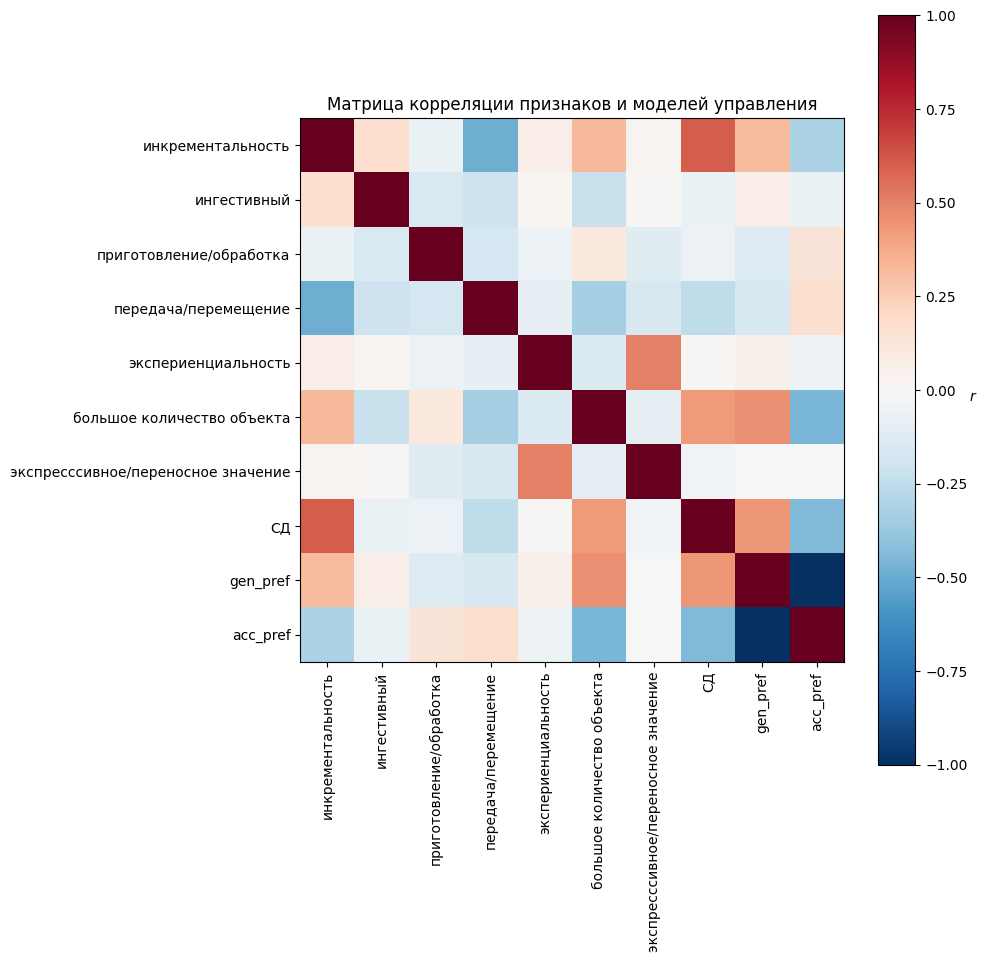

In [15]:
data_with_pref = by_chi2_df.drop(['лексема',
                                  'толкование',
                                  'РП',
                                  'ВП',
                                  'total',
                                  'gen_perc',
                                  'acc_perc',
                                  'chi2',
                                  'p_value'], axis=1)
feature_names = data_with_pref.columns
ax = plt.axes()

X = data_with_pref.to_numpy()
im = ax.imshow(np.corrcoef(X.T), cmap="RdBu_r", vmin=-1, vmax=1)

ax.set_xticks(range(10))
ax.set_xticklabels(list(feature_names), rotation=90)
ax.set_yticks(range(10))
ax.set_yticklabels(list(feature_names))

ax.figure.set_size_inches(10, 10)


plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title('Матрица корреляции признаков и моделей управления')
plt.tight_layout()


**Выводы:**
* Наблюдается наличие наибольшей положительной корреляции между предпочтительным выбором род. падежа прямого дополнения (`gen_pref`) и такими признаками, как инкрементальность, принадлежность глагола к СД и большое количество объекта, и наличие корреляции (меньшей степени) между выбором род. падежа и ингестивным и экспериенциальным значениями.
* Можно констатировать наличие отрицательной корреляции между выбором генитивного
управления и выражением глаголом значений передачи/перемещения и приготовления/обработки.
* Можно говорить о  связи между инкрементальностью с одной стороны и принадлежностью к СД, ингестивным и экспериенциальным глаголам и значением большого количества объекта – с другой.
* Значения передачи/перемещения и приготовления/обработки показывают отрицательную корреляцию практически со всеми признаками (исключение – значение большого количества объекта, что может объясняться наличием среди глаголов кумулятивного СД некоторого количества лексем с семантикой приготовления пищи/обработки).

 ### Критерий Вилкоксона

Создадим пустые списки.

In [16]:
features_list = []
verb_quantity = []
w_statistic = []
w_pvalue = []

Напишем функцию, которая выведет результаты применения W-критерия для проверки гипотезы M(вин. п.) < M(род. п).

In [17]:
def wilcoxon_test_table(feature, feature_name):
    features_list.append(feature_name)
    verb_quantity.append(feature['лексема'].count())
    w_statistic.append(stats.wilcoxon(feature['РП'], feature['ВП'], alternative='greater')[0])
    w_pvalue.append(stats.wilcoxon(feature['РП'], feature['ВП'], alternative='greater')[1])

Отфильтруем датафрейм по положительным/отрицательным значениям признаков в связи со значением признака принадлежности к способу действия.

In [18]:
# СД / не-СД
sd = data[data['СД'] == 1]
no_sd = data[data['СД'] != 1]

# инкрементальные
increm = data[data['инкрементальность'] == 1]
increm_sd = increm[increm['СД'] == 1]
increm_non_sd = increm[increm['СД'] != 1]

# ингестивные
ingest = data[data['ингестивный'] == 1]
ingest_sd = ingest[ingest['СД'] == 1]
ingest_non_sd = ingest[ingest['СД'] != 1]

# большое количество
large = data[data['большое количество объекта'] == 1]
large_sd = large[large['СД'] == 1]
large_non_sd = large[large['СД'] != 1]

Применяем функцию `wilcoxon_test_table` и получаем данные для будущей таблицы.

In [19]:
wilcoxon_test_table(sd, 'СД')
wilcoxon_test_table(no_sd, 'не СД')

wilcoxon_test_table(increm, 'инкрементальный всего')
wilcoxon_test_table(increm_sd, 'инкрементальный СД')
wilcoxon_test_table(increm_non_sd, 'инкрементальный не СД')

wilcoxon_test_table(ingest, 'ингестивный всего')
wilcoxon_test_table(ingest_sd, 'ингестивный СД')
wilcoxon_test_table(ingest_non_sd, 'ингестивный не СД')

wilcoxon_test_table(large, 'большое количество всего')
wilcoxon_test_table(large_sd, 'большое количество СД')
wilcoxon_test_table(large_non_sd, 'большое количество не СД')

Строим таблицу.

In [20]:
wilcoxon_table = pd.DataFrame(
    {
     'признак': features_list,
     'кол-во лексем (из 460)': verb_quantity,
     'W': w_statistic,
     'p-value': w_pvalue
    }
)

Добавляем в таблицу данные о статистической значимости

In [21]:
significance = []
for value in list(wilcoxon_table['p-value']):
    if value < 0.05:
        significance.append(True)
    else:
        significance.append(False)
wilcoxon_table['значимость'] = significance

In [22]:
wilcoxon_table

,признак,кол-во лексем (из 460),W,p-value,значимость
0,СД,400,61654.5,2.938279e-32,True
1,не СД,60,526.5,9.914334e-01,False
2,инкрементальный всего,421,65216.5,3.204744e-27,True
3,инкрементальный СД,392,59249.0,5.314158e-32,True
4,инкрементальный не СД,29,174.5,7.418669e-01,False
5,ингестивный всего,51,944.0,1.300774e-04,True
6,ингестивный СД,37,553.5,4.662039e-05,True
7,ингестивный не СД,14,57.0,2.107894e-01,False
8,большое количество всего,252,26714.5,2.636271e-32,True
9,большое количество СД,251,26480.5,3.958468e-32,True


**Вывод:**

принадлежность к СД является важнейшей характеристикой глагола, влияющей на выбор род. падежа как предпочтительного средства оформления прямого дополнения.

 ### Хи-квадрат

Проализируем распределение род. и вин. падежей при глаголах, характеризующихся различными признаками,  при помощи критерия согласия хи-квадрат. Анализ осуществляется на полной выборке глаголов, для которых в НКРЯ обнаруживаются случаи сочетания хотя бы с одной падежной формой (460 глаголов).

Фильтруем датафрейм по положительным/отрицательным значениям признаков

In [23]:
no_increm = data[data['инкрементальность'] != 1]
no_ingest = data[data['ингестивный'] != 1]
no_large = data[data['большое количество объекта'] != 1]

experience = data[data['экспериенциальность'] == 1]
no_experience = data[data['экспериенциальность'] != 1]
transfer = data[data['передача/перемещение'] == 1]
no_transfer = data[data['передача/перемещение'] != 1]
prepare = data[data['приготовление/обработка'] == 1]
no_prepare = data[data['приготовление/обработка'] != 1]

Создаем пустые списки

In [24]:
features_name = []
gen_number = []
gen_ratio = []
acc_number = []
acc_ratio = []
chi_cquare_value = []
chi_pvalue = []

Функция, определяющая хи-квадрат и значение p для распределений род. и вин. падежей при глаголах с положительными (+) и отрицательными (-) значениями признаков

In [25]:
def chi_square_table(feature_plus, feature_minus, feature_plus_name, feature_minus_name):

    a=sum(feature_plus['РП'])/(sum(feature_plus['РП'])+sum(feature_plus['ВП']))*100
    b=sum(feature_plus['ВП'])/(sum(feature_plus['РП'])+sum(feature_plus['ВП']))*100
    c=sum(feature_minus['РП'])/(sum(feature_minus['РП'])+sum(feature_minus['ВП']))*100
    d=sum(feature_minus['ВП'])/(sum(feature_minus['РП'])+sum(feature_minus['ВП']))*100

    obs = np.array([[sum(feature_plus['РП']), sum(feature_plus['ВП'])],
                    [sum(feature_minus['РП']), sum(feature_minus['ВП'])]])
    chi_square, p_value = stats.chi2_contingency(obs)[:2]

    features_name.append(feature_plus_name)
    gen_number.append(sum(feature_plus['РП']))
    gen_ratio.append(a)
    acc_number.append(sum(feature_plus['ВП']))
    acc_ratio.append(b)

    features_name.append(feature_minus_name)
    gen_number.append(sum(feature_minus['РП']))
    gen_ratio.append(c)
    acc_number.append(sum(feature_minus['ВП']))
    acc_ratio.append(d)

    chi_cquare_value.append(chi_square)
    chi_pvalue.append(p_value)
    chi_cquare_value.append(None)
    chi_pvalue.append(None)

**хи-квадрат для +/- значений признаков**

In [26]:
chi_square_table(increm, no_increm, '+инкрементальность', '-инкрементальность')

In [27]:
chi_square_table(sd, no_sd, '+СД', '-СД')

In [28]:
chi_square_table(ingest, no_ingest, '+ингестивный', '-ингестивный')

In [29]:
chi_square_table(large, no_large, '+большое количество', '-большое количество')

In [30]:
chi_square_table(experience, no_experience, '+экспериенциальность', '-экспериенциальность')

In [31]:
chi_square_table(transfer, no_transfer, '+перемещение', '-перемещение')

In [32]:
chi_square_table(prepare, no_prepare, '+приготовление', '-приготовление')

In [33]:
chi_square_table_ = pd.DataFrame(
    {
        'значение признака': features_name,
        'РП': gen_number,
        '%РП': gen_ratio,
        'ВП': acc_number,
        '%ВП': acc_ratio,
        'хи-квадрат': chi_cquare_value,
        'p-value': chi_pvalue
    }
)

In [34]:
chi_square_table_

,значение признака,РП,%РП,ВП,%ВП,хи-квадрат,p-value
0,+инкрементальность,21697,69.034968,9732,30.965032,4829.392390,0.000000e+00
1,-инкрементальность,1669,24.048991,5271,75.951009,NaN,NaN
2,+СД,18143,74.971074,6057,25.028926,5448.765280,0.000000e+00
3,-СД,5223,36.862164,8946,63.137836,NaN,NaN
4,+ингестивный,7232,71.469513,2887,28.530487,644.401240,3.687561e-142
5,-ингестивный,16134,57.111504,12116,42.888496,NaN,NaN
6,+большое количество,5731,84.727972,1033,15.272028,1957.041017,0.000000e+00
7,-большое количество,17635,55.798133,13970,44.201867,NaN,NaN
8,+экспериенциальность,622,67.903930,294,32.096070,19.041905,1.278791e-05
9,-экспериенциальность,22744,60.726778,14709,39.273222,NaN,NaN


**Вывод:** такие признаки, как инкрементальность, принадлежность к СД, ингестивным и экспериенциальным глаголам и большое количество объекта повышают вероятность употребления род. падежа, а приготовление/обработка и перемещение/передача – вин. падежа.